# **Pandas - Data Visualization Tools**

In [ ]:
import pandas as pd

df = pd.read_csv('zara_cleaned.csv')

In [ ]:
df

,Product ID,Release,Product Position,Section,Terms,SKU,Name,Seasonal,Promotion,Price,Sales Volume,Total Sales,Year Released
0,179801,2023-10-21,Front of Store,Man,Jackets,311307255-800-2,Contrasting Patches Bomber Jacket,Yes,No,169.0,2608,440752.0,2023
1,183243,2023-07-01,Front of Store,Man,Jackets,328250627-251-46,Suit Jacket,No,Yes,169.0,1524,257556.0,2023
2,177771,2023-01-22,End-cap,Man,T-Shirts,281883711-071-2,Suit Jacket,Yes,Yes,69.9,1764,123303.6,2023
3,171860,2023-01-04,Aisle,NaN,T-Shirts,323646471-802-2,Padded Denim Jacket,No,Yes,109.0,707,77063.0,2023
4,166331,2023-07-09,Aisle,Woman,Sweaters,324186867-642-2,Asymmetrical Wool And Silk Blend Sweater,Yes,Yes,59.9,2877,172332.3,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,125409,2023-04-08,End-cap,Man,Jackets,330290360-427-3,Pocket Denim Jacket,No,Yes,89.9,2040,183396.0,2023
250,190238,2024-03-08,Front of Store,Man,Jackets,328279967-409-3,Acid Wash Denim Jacket,Yes,No,89.9,1917,172338.3,2024
251,183074,2024-01-29,Aisle,Man,Jackets,320449897-427-2,Boxy Fit Denim Jacket,No,No,89.9,2791,250910.9,2024
252,199368,2023-12-11,Front of Store,NaN,Jackets,336821611-706-2,Wool Blend Jacket,Yes,No,139.0,1061,147479.0,2023


#### 1. Which product category has the highest total sales revenue?

In [ ]:
category_sales = df.groupby('Terms')['Total Sales'].sum()

In [ ]:
category_sales

,Total Sales
Terms,
Jackets,28993706.87
Jeans,864385.25
Shoes,3754837.63
Sweaters,4090631.48
T-Shirts,3696806.25


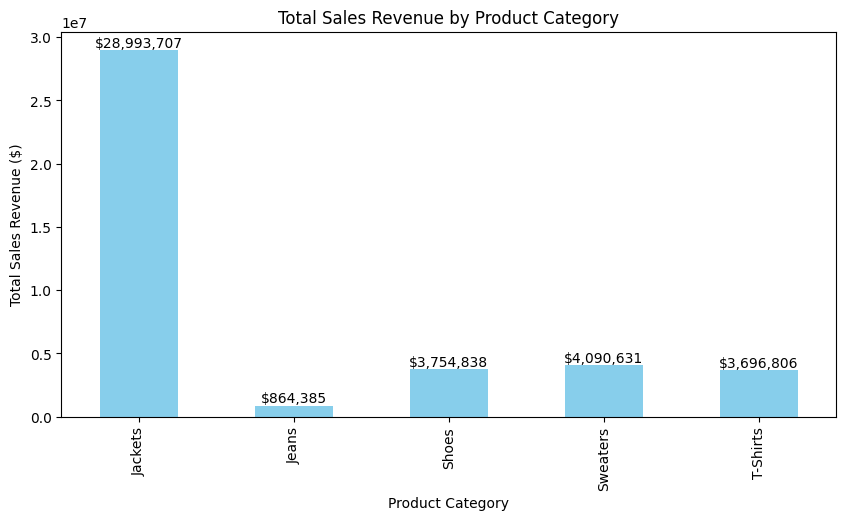

In [ ]:
ax1 = category_sales.plot(kind='bar',
                         title='Total Sales Revenue by Product Category',
                         figsize=(10, 5),
                         color='skyblue')

ax1.set_ylabel('Total Sales Revenue ($)')
ax1.set_xlabel('Product Category')

for i, v in enumerate(category_sales):
    ax1.text(i, v, f'${v:,.0f}', ha='center', va='bottom')

#### 2. How does product positioning in the store (Front of Store, End-cap, Aisle) correlate with total sales performance?

In [ ]:
position_sales = df.groupby('Product Position')['Total Sales'].sum()

In [ ]:
position_sales

,Total Sales
Product Position,
Aisle,15926438.03
End-cap,13466960.01
Front of Store,12006969.44


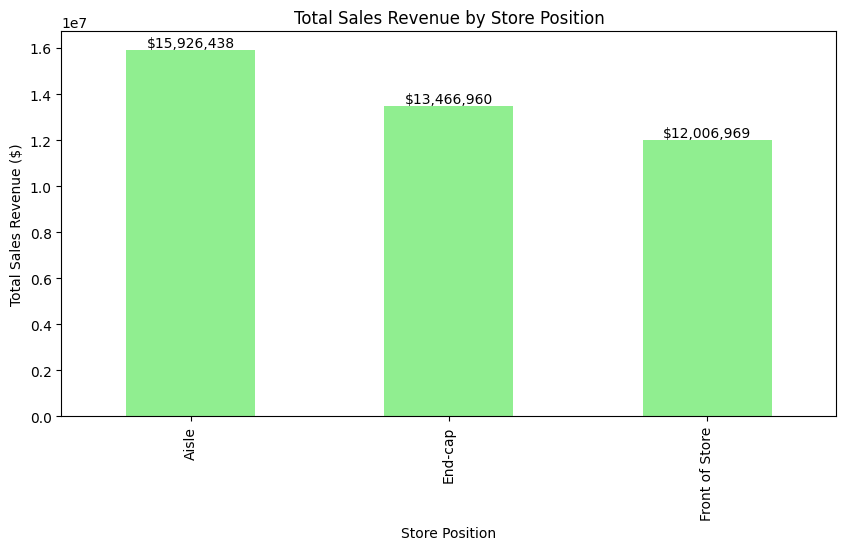

In [ ]:
ax2 = position_sales.plot(kind='bar',
                         title='Total Sales Revenue by Store Position',
                         figsize=(10, 5),
                         color='lightgreen')
ax2.set_ylabel('Total Sales Revenue ($)')
ax2.set_xlabel('Store Position')

# Add value labels on top of bars
for i, v in enumerate(position_sales):
    ax2.text(i, v, f'${v:,.0f}', ha='center', va='bottom')

#### 3. Which product Terms sold the most and how does it correlate with Product Position



In [ ]:
term_position = df.groupby(['Terms', 'Product Position'])['Sales Volume'].sum()

In [ ]:
term_position

Terms     Product Position
Jackets   Aisle               104747
          End-cap              77705
          Front of Store       79915
Jeans     Aisle                 4599
          End-cap               5171
          Front of Store        3550
Shoes     Aisle                24412
          End-cap              17906
          Front of Store       15588
Sweaters  Aisle                20022
          End-cap              32714
          Front of Store       22506
T-Shirts  Aisle                25786
          End-cap              19434
          Front of Store        8417
Name: Sales Volume, dtype: int64

Text(0.5, 1.0, 'Total Orders by Ship Mode and Segment')

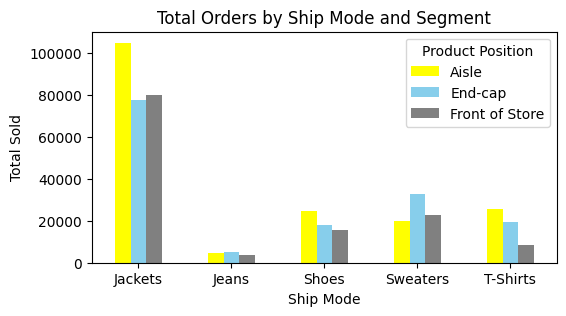

In [ ]:
ax1 = term_position.unstack().plot(kind='bar',
                               stacked=False,
                               figsize=(6, 3),
                               color=['yellow', 'skyblue', 'gray'],
                               rot=0)
ax1.set_ylabel('Total Sold')
ax1.set_xlabel('Ship Mode')
ax1.set_title('Total Orders by Ship Mode and Segment')